In [1]:
from __future__ import annotations
import sys
    # caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, 'D:/books/python/0.Data Science from Scratch- First Principles with Python/data-science-from-scratch/scratch/')
sys.path

['D:\\books\\python\\0.Data Science from Scratch- First Principles with Python',
 'D:/books/python/0.Data Science from Scratch- First Principles with Python/data-science-from-scratch/scratch/',
 'C:\\Users\\lidan\\miniconda3\\python38.zip',
 'C:\\Users\\lidan\\miniconda3\\DLLs',
 'C:\\Users\\lidan\\miniconda3\\lib',
 'C:\\Users\\lidan\\miniconda3',
 '',
 'C:\\Users\\lidan\\AppData\\Roaming\\Python\\Python38\\site-packages',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\magic_impute-2.0.4-py3.8.egg',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\seqc-0.2.0-py3.8.egg',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\weasyprint-56.1-py3.8.egg',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\cairocffi-1.3.0-py3.8.egg',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\win32',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\Pythonwin']

In [2]:
data = [ ("big data", 100, 15), ("Hadoop", 95, 25), ("Python", 75, 50),
         ("R", 50, 40), ("machine learning", 80, 20), ("statistics", 20, 60),
         ("data science", 60, 70), ("analytics", 90, 3),
         ("team player", 85, 85), ("dynamic", 2, 90), ("synergies", 70, 0),
         ("actionable insights", 40, 30), ("think out of the box", 45, 10),
         ("self-starter", 30, 50), ("customer focus", 65, 15),
         ("thought leadership", 35, 35)]


from matplotlib import pyplot as plt

def fix_unicode(text: str) -> str:
    return text.replace(u"\u2019", "'")

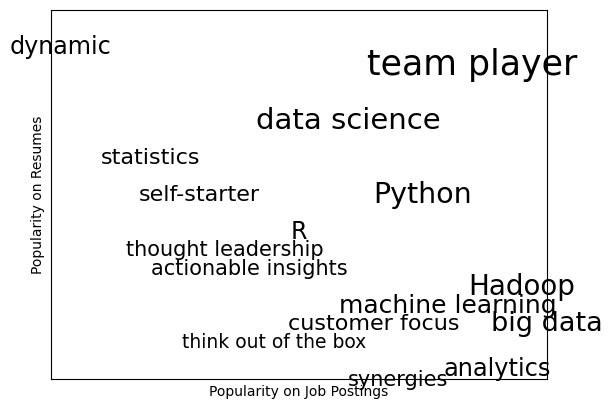

In [3]:
from matplotlib import pyplot as plt
def text_size(total: int) -> float:
    """equals 8 if total is 0, 28 if total is 200"""
    return 8 + total / 200 * 20
for word, job_popularity, resume_popularity in data:
    plt.text(job_popularity, resume_popularity, word,
             ha='center', va='center',
             size=text_size(job_popularity + resume_popularity))
plt.xlabel("Popularity on Job Postings")
plt.ylabel("Popularity on Resumes")
plt.axis([0, 100, 0, 100])
plt.xticks([])
plt.yticks([])
plt.show()

In [4]:
def fix_unicode(text: str) -> str:
    return text.replace(u"\u2019", "'")

In [5]:
print(u"\u2019")

’


In [6]:
import re
from bs4 import BeautifulSoup
import requests

url = "https://www.oreilly.com/ideas/what-is-data-science"
html = requests.get(url).text
soup = BeautifulSoup(html, 'html5lib')

In [7]:
#content = soup("div")   # find article-body div
regex = r"[\w']+|[\.]"                       # matches a word or a period

document = []

In [8]:
for paragraph in soup("p"):
    words = re.findall(regex, fix_unicode(paragraph.text))
    document.extend(words)
    
document[:5]

['The', 'future', 'belongs', 'to', 'the']

In [9]:
from collections import defaultdict

transitions = defaultdict(list)
for prev, current in zip(document, document[1:]):
    transitions[prev].append(current)

In [10]:
transitions['The'][:5]

['future', 'web', 'developers', 'thread', 'question']

In [14]:
import random
def generate_using_bigrams() -> str:
    current = "."   # this means the next word will start a sentence
    result = []
    while True:
        next_word_candidates = transitions[current]    # bigrams (current, _)
        current = random.choice(next_word_candidates)  # choose one at random
        result.append(current)                         # append it to results
        if current == ".": return " ".join(result)     # if "." we're done

In [15]:
[generate_using_bigrams() for _ in range(5)]

['The importance of the â Appleâ from many large number of these databases though these applications together at membersâ profiles and of known data analysis and isnâ t just spent a book isnâ t just their machine learning almost everything from a CD thatâ s Law comes in a large problem isnâ t superseded by neighborhood per dollar or raw capacity storage capacity demands increased sophistication in formats that were the story to find the foundation of the first flippant answer to take thousands of identical subtasks which cover topics as scientist â eventual consistencyâ but to work with new products from ancient Unix utilities such .',
 'While there are but there are you take data all trying to look for when she gets a successful retail chain spread of ozone layer depletion was delayed because everyone who dies has increased sophistication in a de allocate processors and middleware that personâ s identity using smaller auxiliary problems ranging from the classification for hours of sub

In [16]:
trigram_transitions = defaultdict(list)
starts = []

for prev, current, next in zip(document, document[1:], document[2:]):

    if prev == ".":              # if the previous "word" was a period
        starts.append(current)   # then this is a start word

    trigram_transitions[(prev, current)].append(next)

In [17]:
starts[:5]

['Weâ', 'Five', '0', 'â', 'Join']

In [18]:
trigram_transitions[('to', 'the')]

['companies', 'products', 'problem', 'point', 'same', 'companies', '70s']

In [19]:
trigram_transitions[('.', 'The')]

['web',
 'developers',
 'thread',
 'question',
 'web',
 'importance',
 'more',
 'data',
 'foreclosure',
 'need',
 'most',
 'Turk',
 'problem',
 'result',
 'part']

In [20]:
def generate_using_trigrams() -> str:
    current = random.choice(starts)   # choose a random starting word
    prev = "."                        # and precede it with a '.'
    result = [current]
    while True:
        next_word_candidates = trigram_transitions[(prev, current)]
        next_word = random.choice(next_word_candidates)

        prev, current = current, next_word
        result.append(current)

        if current == ".":
            return " ".join(result)

In [21]:
[generate_using_trigrams() for _ in range(5)]

['0 and of Mooreâ s Law comes in .',
 'You can allocate and de allocate processors as needed paying only for the data rather than tackling a huge mountain of data that can easily be rolled back if any one of a complex set of numbers .',
 'They expose rich APIs and are designed to be fun to process .',
 'Describing the data you canâ t just about the existence of data .',
 'Hilary Mason says that in 1984 they decided that the conclusions youâ re going to get presentable results .']

In [22]:
from typing import List, Dict

# Type alias to refer to grammars later
Grammar = Dict[str, List[str]]

grammar = {
    "_S"  : ["_NP _VP"],
    "_NP" : ["_N",
             "_A _NP _P _A _N"],
    "_VP" : ["_V",
             "_V _NP"],
    "_N"  : ["data science", "Python", "regression"],
    "_A"  : ["big", "linear", "logistic"],
    "_P"  : ["about", "near"],
    "_V"  : ["learns", "trains", "tests", "is"]
}

In [23]:
grammar["_S"]

['_NP _VP']

In [24]:
def is_terminal(token: str) -> bool:
    return token[0] != "_"

def expand(grammar: Grammar, tokens: List[str]) -> List[str]:
    for i, token in enumerate(tokens):
        # If this is a terminal token, skip it.
        if is_terminal(token): continue

        # Otherwise, it's a non-terminal token,
        # so we need to choose a replacement at random.
        replacement = random.choice(grammar[token])

        if is_terminal(replacement):
            tokens[i] = replacement
        else:
            # Replacement could be e.g. "_NP _VP", so we need to
            # split it on spaces and splice it in.
            tokens = tokens[:i] + replacement.split() + tokens[(i+1):]

        # Now call expand on the new list of tokens.
        return expand(grammar, tokens)

    # If we get here we had all terminals and are done
    return tokens

In [25]:
def generate_sentence(grammar: Grammar) -> List[str]:
    return expand(grammar, ["_S"])

In [26]:
for i, token in enumerate(["_S"]):
    print(i, token)

0 _S


In [27]:
[generate_sentence(grammar) for _ in range(2)]

[['big',
  'linear',
  'data science',
  'about',
  'big',
  'regression',
  'near',
  'logistic',
  'regression',
  'is',
  'logistic',
  'linear',
  'linear',
  'Python',
  'about',
  'linear',
  'regression',
  'about',
  'logistic',
  'regression',
  'near',
  'big',
  'Python'],
 ['big',
  'logistic',
  'data science',
  'near',
  'logistic',
  'Python',
  'near',
  'logistic',
  'regression',
  'tests',
  'data science']]

In [28]:
is_terminal("_S")

False

In [29]:
random.choice(grammar["_S"])

'_NP _VP'

In [30]:
is_terminal('_NP _VP')

False

In [31]:
tokens = ["_S"]
tokens[:0]

[]

In [32]:
tokens[1:]

[]

In [33]:
from typing import Tuple
import random

def roll_a_die() -> int:
    return random.choice([1, 2, 3, 4, 5, 6])

def direct_sample() -> Tuple[int, int]:
    d1 = roll_a_die()
    d2 = roll_a_die()
    return d1, d1 + d2

def random_y_given_x(x: int) -> int:
    """equally likely to be x + 1, x + 2, ... , x + 6"""
    return x + roll_a_die()

In [34]:
def random_x_given_y(y: int) -> int:
    if y <= 7:
        # if the total is 7 or less, the first die is equally likely to be
        # 1, 2, ..., (total - 1)
        return random.randrange(1, y)
    else:
        # if the total is 7 or more, the first die is equally likely to be
        # (total - 6), (total - 5), ..., 6
        return random.randrange(y - 6, 7)

def gibbs_sample(num_iters: int = 100) -> Tuple[int, int]:
    x, y = 1, 2 # doesn't really matter
    for _ in range(num_iters):
        x = random_x_given_y(y)
        y = random_y_given_x(x)
    return x, y

def compare_distributions(num_samples: int = 1000) -> Dict[int, List[int]]:
    counts = defaultdict(lambda: [0, 0])
    for _ in range(num_samples):
        counts[gibbs_sample()][0] += 1
        counts[direct_sample()][1] += 1
    return counts

In [35]:
compare_distributions(1000)

defaultdict(<function __main__.compare_distributions.<locals>.<lambda>()>,
            {(1, 6): [26, 28],
             (4, 5): [28, 19],
             (6, 10): [27, 32],
             (6, 7): [31, 29],
             (2, 8): [37, 38],
             (2, 6): [33, 29],
             (3, 9): [26, 37],
             (3, 5): [18, 33],
             (3, 6): [21, 33],
             (5, 11): [28, 31],
             (6, 8): [27, 32],
             (1, 3): [40, 23],
             (6, 9): [34, 16],
             (1, 5): [28, 40],
             (4, 10): [29, 34],
             (2, 7): [27, 23],
             (5, 10): [22, 28],
             (4, 7): [28, 23],
             (5, 8): [25, 23],
             (2, 4): [29, 27],
             (1, 4): [31, 33],
             (6, 11): [27, 23],
             (4, 8): [33, 23],
             (5, 6): [29, 26],
             (6, 12): [22, 31],
             (3, 7): [25, 30],
             (2, 3): [27, 29],
             (4, 9): [27, 32],
             (5, 7): [28, 22],
             (5, 9):

In [36]:
def sample_from(weights: List[float]) -> int:
    """returns i with probability weights[i] / sum(weights)"""
    total = sum(weights)
    rnd = total * random.random()      # uniform between 0 and total
    for i, w in enumerate(weights):
        rnd -= w                       # return the smallest i such that
        if rnd <= 0: return i          # weights[0] + ... + weights[i] >= rnd

from collections import Counter

# Draw 1000 times and count
draws = Counter(sample_from([0.1, 0.1, 0.8]) for _ in range(1000))
assert 10 < draws[0] < 190   # should be ~10%, this is a really loose test
assert 10 < draws[1] < 190   # should be ~10%, this is a really loose test
assert 650 < draws[2] < 950  # should be ~80%, this is a really loose test
assert draws[0] + draws[1] + draws[2] == 1000

In [41]:
draws

Counter({2: 799, 0: 106, 1: 95})

In [42]:
draws[0], draws[1], draws[2]

(106, 95, 799)

In [54]:
documents = [
    ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
    ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
    ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
    ["R", "Python", "statistics", "regression", "probability"],
    ["machine learning", "regression", "decision trees", "libsvm"],
    ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
    ["statistics", "probability", "mathematics", "theory"],
    ["machine learning", "scikit-learn", "Mahout", "neural networks"],
    ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
    ["Hadoop", "Java", "MapReduce", "Big Data"],
    ["statistics", "R", "statsmodels"],
    ["C++", "deep learning", "artificial intelligence", "probability"],
    ["pandas", "R", "Python"],
    ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
    ["libsvm", "regression", "support vector machines"]
]

K = 4

In [55]:
len(documents)

15

In [56]:
# a list of Counters, one for each document
document_topic_counts = [Counter() for _ in documents]
document_topic_counts

[Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter()]

In [47]:
# a list of Counters, one for each topic # 4 topics
topic_word_counts = [Counter() for _ in range(K)]
topic_word_counts

[Counter(), Counter(), Counter(), Counter()]

In [48]:
# a list of numbers, one for each topic
topic_counts = [0 for _ in range(K)]
topic_counts

[0, 0, 0, 0]

In [49]:
# a list of numbers, one for each document
document_lengths = [len(document) for document in documents]
document_lengths

[7, 5, 6, 5, 4, 6, 4, 4, 4, 4, 3, 4, 3, 5, 3]

In [50]:
distinct_words = set(word for document in documents for word in document)
distinct_words

{'Big Data',
 'C++',
 'Cassandra',
 'HBase',
 'Hadoop',
 'Haskell',
 'Java',
 'Mahout',
 'MapReduce',
 'MongoDB',
 'MySQL',
 'NoSQL',
 'Postgres',
 'Python',
 'R',
 'Spark',
 'Storm',
 'artificial intelligence',
 'databases',
 'decision trees',
 'deep learning',
 'libsvm',
 'machine learning',
 'mathematics',
 'neural networks',
 'numpy',
 'pandas',
 'probability',
 'programming languages',
 'regression',
 'scikit-learn',
 'scipy',
 'statistics',
 'statsmodels',
 'support vector machines',
 'theory'}

In [51]:
W = len(distinct_words)

D = len(documents)

W, D

(36, 15)

In [53]:
# the number of words in document[3] associated with topic 1
document_topic_counts[3][1]

0

In [57]:
def p_topic_given_document(topic: int, d: int, alpha: float = 0.1) -> float:
    """
    The fraction of words in document _d_
    that are assigned to _topic_ (plus some smoothing)
    """
    return ((document_topic_counts[d][topic] + alpha) /
            (document_lengths[d] + K * alpha))

def p_word_given_topic(word: str, topic: int, beta: float = 0.1) -> float:
    """
    The fraction of words assigned to _topic_
    that equal _word_ (plus some smoothing)
    """
    return ((topic_word_counts[topic][word] + beta) /
            (topic_counts[topic] + W * beta))

In [58]:
def topic_weight(d: int, word: str, k: int) -> float:
    """
    Given a document and a word in that document,
    return the weight for the kth topic
    """
    return p_word_given_topic(word, k) * p_topic_given_document(k, d)

def choose_new_topic(d: int, word: str) -> int:
    return sample_from([topic_weight(d, word, k)
                        for k in range(K)])

random.seed(0)
document_topics = [[random.randrange(K) for word in document]
                   for document in documents]

for d in range(D):
    for word, topic in zip(documents[d], document_topics[d]):
        document_topic_counts[d][topic] += 1
        topic_word_counts[topic][word] += 1
        topic_counts[topic] += 1

In [59]:
document_topics # random

[[3, 3, 0, 2, 3, 3, 2],
 [3, 2, 1, 1, 2],
 [1, 0, 2, 1, 2, 0],
 [0, 2, 3, 0, 2],
 [3, 2, 1, 3],
 [3, 2, 0, 0, 0, 3],
 [0, 3, 2, 1],
 [2, 0, 1, 1],
 [1, 1, 3, 0],
 [0, 2, 3, 0],
 [2, 2, 0],
 [2, 1, 2, 3],
 [0, 3, 2],
 [1, 2, 1, 1, 1],
 [0, 2, 3]]

In [60]:
documents[0], document_topics[0]

(['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra'],
 [3, 3, 0, 2, 3, 3, 2])

In [61]:
topic_counts

[16, 15, 20, 16]

In [62]:
document_topic_counts

[Counter({3: 4, 0: 1, 2: 2}),
 Counter({3: 1, 2: 2, 1: 2}),
 Counter({1: 2, 0: 2, 2: 2}),
 Counter({0: 2, 2: 2, 3: 1}),
 Counter({3: 2, 2: 1, 1: 1}),
 Counter({3: 2, 2: 1, 0: 3}),
 Counter({0: 1, 3: 1, 2: 1, 1: 1}),
 Counter({2: 1, 0: 1, 1: 2}),
 Counter({1: 2, 3: 1, 0: 1}),
 Counter({0: 2, 2: 1, 3: 1}),
 Counter({2: 2, 0: 1}),
 Counter({2: 2, 1: 1, 3: 1}),
 Counter({0: 1, 3: 1, 2: 1}),
 Counter({1: 4, 2: 1}),
 Counter({0: 1, 2: 1, 3: 1})]

In [63]:
topic_word_counts

[Counter({'HBase': 1,
          'scikit-learn': 2,
          'pandas': 2,
          'R': 1,
          'regression': 1,
          'Java': 1,
          'C++': 1,
          'Haskell': 1,
          'statistics': 1,
          'artificial intelligence': 1,
          'Hadoop': 1,
          'Big Data': 1,
          'statsmodels': 1,
          'libsvm': 1}),
 Counter({'Cassandra': 1,
          'HBase': 1,
          'Python': 1,
          'numpy': 1,
          'decision trees': 1,
          'theory': 1,
          'Mahout': 1,
          'neural networks': 2,
          'deep learning': 2,
          'databases': 1,
          'Postgres': 1,
          'MySQL': 1,
          'MongoDB': 1}),
 Counter({'Java': 2,
          'Cassandra': 1,
          'MongoDB': 1,
          'Postgres': 1,
          'scipy': 1,
          'statsmodels': 1,
          'Python': 2,
          'probability': 1,
          'regression': 2,
          'R': 2,
          'mathematics': 1,
          'machine learning': 1,
          'sta

In [64]:
document_topics # random

[[3, 3, 0, 2, 3, 3, 2],
 [3, 2, 1, 1, 2],
 [1, 0, 2, 1, 2, 0],
 [0, 2, 3, 0, 2],
 [3, 2, 1, 3],
 [3, 2, 0, 0, 0, 3],
 [0, 3, 2, 1],
 [2, 0, 1, 1],
 [1, 1, 3, 0],
 [0, 2, 3, 0],
 [2, 2, 0],
 [2, 1, 2, 3],
 [0, 3, 2],
 [1, 2, 1, 1, 1],
 [0, 2, 3]]

In [65]:
import tqdm

for iter in tqdm.trange(1000):
    for d in range(D): # D is number of documents 15
        for i, (word, topic) in enumerate(zip(documents[d],
                                              document_topics[d])):

            # remove this word / topic from the counts
            # so that it doesn't influence the weights
            document_topic_counts[d][topic] -= 1
            topic_word_counts[topic][word] -= 1
            topic_counts[topic] -= 1
            document_lengths[d] -= 1

            # choose a new topic based on the weights
            new_topic = choose_new_topic(d, word)
            document_topics[d][i] = new_topic

            # and now add it back to the counts
            document_topic_counts[d][new_topic] += 1
            topic_word_counts[new_topic][word] += 1
            topic_counts[new_topic] += 1
            document_lengths[d] += 1

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1689.19it/s]


In [66]:
document_topic_counts

[Counter({3: 0, 0: 7, 2: 0, 1: 0}),
 Counter({3: 0, 2: 0, 1: 5, 0: 0}),
 Counter({1: 2, 0: 0, 2: 2, 3: 2}),
 Counter({0: 0, 2: 2, 3: 3, 1: 0}),
 Counter({3: 0, 2: 2, 1: 2, 0: 0}),
 Counter({3: 0, 2: 3, 0: 3, 1: 0}),
 Counter({0: 0, 3: 3, 2: 1, 1: 0}),
 Counter({2: 2, 0: 0, 1: 2, 3: 0}),
 Counter({1: 3, 3: 0, 0: 1, 2: 0}),
 Counter({0: 4, 2: 0, 3: 0, 1: 0}),
 Counter({2: 0, 0: 0, 3: 3, 1: 0}),
 Counter({2: 0, 1: 0, 3: 3, 0: 1}),
 Counter({0: 0, 3: 3, 2: 0, 1: 0}),
 Counter({1: 5, 2: 0, 3: 0, 0: 0}),
 Counter({0: 0, 2: 3, 3: 0, 1: 0})]

In [67]:
topic_word_counts

[Counter({'HBase': 1,
          'scikit-learn': 0,
          'pandas': 0,
          'R': 0,
          'regression': 0,
          'Java': 3,
          'C++': 1,
          'Haskell': 0,
          'statistics': 0,
          'artificial intelligence': 0,
          'Hadoop': 2,
          'Big Data': 3,
          'statsmodels': 0,
          'libsvm': 0,
          'Spark': 1,
          'Storm': 1,
          'programming languages': 1,
          'machine learning': 0,
          'MapReduce': 1,
          'scipy': 0,
          'numpy': 0,
          'support vector machines': 0,
          'Cassandra': 1,
          'deep learning': 1,
          'decision trees': 0,
          'neural networks': 0,
          'databases': 0,
          'probability': 0,
          'theory': 0,
          'NoSQL': 0,
          'Mahout': 0,
          'mathematics': 0,
          'Postgres': 0,
          'Python': 0,
          'MySQL': 0,
          'MongoDB': 0}),
 Counter({'Cassandra': 1,
          'HBase': 2,
          'P

In [68]:
topic_counts

[16, 19, 15, 17]

In [69]:
document_lengths

[7, 5, 6, 5, 4, 6, 4, 4, 4, 4, 3, 4, 3, 5, 3]

In [70]:
for k, word_counts in enumerate(topic_word_counts):
    for word, count in word_counts.most_common():
        if count > 0:
            print(k, word, count)

topic_names = ["Big Data and programming languages",
               "Python and statistics",
               "databases",
               "machine learning"]

0 Java 3
0 Big Data 3
0 Hadoop 2
0 HBase 1
0 C++ 1
0 Spark 1
0 Storm 1
0 programming languages 1
0 MapReduce 1
0 Cassandra 1
0 deep learning 1
1 HBase 2
1 neural networks 2
1 Postgres 2
1 MongoDB 2
1 machine learning 2
1 Cassandra 1
1 numpy 1
1 decision trees 1
1 deep learning 1
1 databases 1
1 MySQL 1
1 NoSQL 1
1 artificial intelligence 1
1 scipy 1
2 regression 3
2 Python 2
2 R 2
2 libsvm 2
2 scikit-learn 2
2 mathematics 1
2 support vector machines 1
2 Haskell 1
2 Mahout 1
3 statistics 3
3 probability 3
3 Python 2
3 R 2
3 pandas 2
3 statsmodels 2
3 C++ 1
3 artificial intelligence 1
3 theory 1


In [71]:
for document, topic_counts in zip(documents, document_topic_counts):
    print(document)
    for topic, count in topic_counts.most_common():
        if count > 0:
            print(topic_names[topic], count)
    print()

['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']
Big Data and programming languages 7

['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres']
Python and statistics 5

['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas']
Python and statistics 2
databases 2
machine learning 2

['R', 'Python', 'statistics', 'regression', 'probability']
machine learning 3
databases 2

['machine learning', 'regression', 'decision trees', 'libsvm']
databases 2
Python and statistics 2

['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages']
databases 3
Big Data and programming languages 3

['statistics', 'probability', 'mathematics', 'theory']
machine learning 3
databases 1

['machine learning', 'scikit-learn', 'Mahout', 'neural networks']
databases 2
Python and statistics 2

['neural networks', 'deep learning', 'Big Data', 'artificial intelligence']
Python and statistics 3
Big Data and programming languages 1

['Hadoop', 'Java', 'MapReduce', 'Big Data']
Big D

In [72]:
from linear_algebra import dot, Vector
import math

def cosine_similarity(v1: Vector, v2: Vector) -> float:
    return dot(v1, v2) / math.sqrt(dot(v1, v1) * dot(v2, v2))

assert cosine_similarity([1., 1, 1], [2., 2, 2]) == 1, "same direction"
assert cosine_similarity([-1., -1], [2., 2]) == -1,    "opposite direction"
assert cosine_similarity([1., 0], [0., 1]) == 0,       "orthogonal"

colors = ["red", "green", "blue", "yellow", "black", ""]
nouns = ["bed", "car", "boat", "cat"]
verbs = ["is", "was", "seems"]
adverbs = ["very", "quite", "extremely", ""]
adjectives = ["slow", "fast", "soft", "hard"]

In [73]:
def make_sentence() -> str:
    return " ".join([
        "The",
        random.choice(colors),
        random.choice(nouns),
        random.choice(verbs),
        random.choice(adverbs),
        random.choice(adjectives),
        "."
    ])

NUM_SENTENCES = 50

random.seed(0)
sentences = [make_sentence() for _ in range(NUM_SENTENCES)]

In [74]:
sentences

['The yellow cat is extremely hard .',
 'The yellow boat was extremely fast .',
 'The black car was quite slow .',
 'The black boat seems quite soft .',
 'The red bed seems extremely hard .',
 'The black bed was  soft .',
 'The black car seems  hard .',
 'The black boat is very slow .',
 'The  cat seems very hard .',
 'The blue car seems extremely slow .',
 'The green car is quite hard .',
 'The red bed was  slow .',
 'The blue boat seems very soft .',
 'The black car seems extremely hard .',
 'The red cat was quite soft .',
 'The green car is very soft .',
 'The yellow bed is quite fast .',
 'The red bed seems  soft .',
 'The black car is  soft .',
 'The yellow cat seems extremely slow .',
 'The blue bed was extremely fast .',
 'The green bed seems extremely slow .',
 'The  car was quite soft .',
 'The yellow bed is quite fast .',
 'The red bed is very fast .',
 'The black bed was very soft .',
 'The red bed seems very fast .',
 'The green bed was quite slow .',
 'The  bed seems  slow

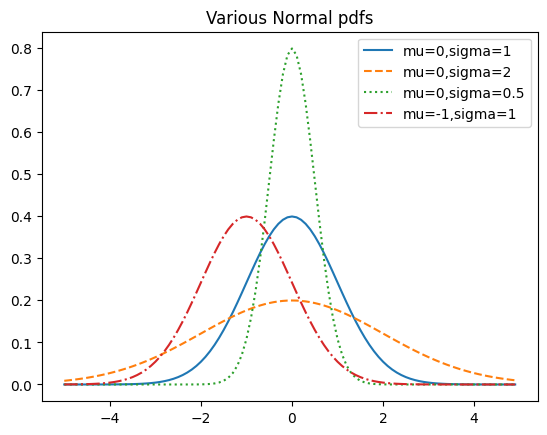

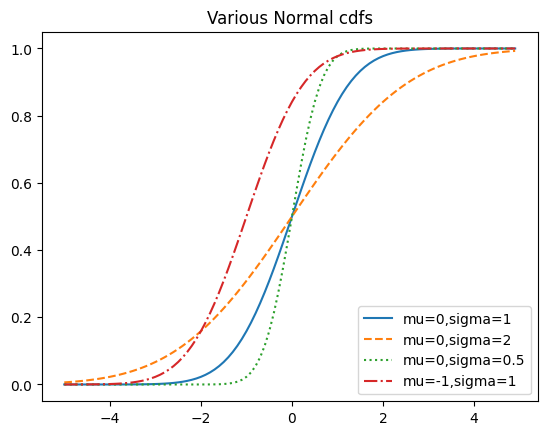

In [75]:
from deep_learning import Tensor

class Vocabulary:
    def __init__(self, words: List[str] = None) -> None:
        self.w2i: Dict[str, int] = {}  # mapping word -> word_id
        self.i2w: Dict[int, str] = {}  # mapping word_id -> word

        for word in (words or []):     # If words were provided,
            self.add(word)             # add them.

    @property
    def size(self) -> int:
        """how many words are in the vocabulary"""
        return len(self.w2i)

    def add(self, word: str) -> None:
        if word not in self.w2i:        # If the word is new to us:
            word_id = len(self.w2i)     # Find the next id.
            self.w2i[word] = word_id    # Add to the word -> word_id map.
            self.i2w[word_id] = word    # Add to the word_id -> word map.

    def get_id(self, word: str) -> int:
        """return the id of the word (or None)"""
        return self.w2i.get(word)

    def get_word(self, word_id: int) -> str:
        """return the word with the given id (or None)"""
        return self.i2w.get(word_id)

    def one_hot_encode(self, word: str) -> Tensor:
        word_id = self.get_id(word)
        assert word_id is not None, f"unknown word {word}"

        return [1.0 if i == word_id else 0.0 for i in range(self.size)]

In [76]:
vocab = Vocabulary(["a", "b", "c"])
assert vocab.size == 3,              "there are 3 words in the vocab"
assert vocab.get_id("b") == 1,       "b should have word_id 1"
assert vocab.one_hot_encode("b") == [0, 1, 0]
assert vocab.get_id("z") is None,    "z is not in the vocab"
assert vocab.get_word(2) == "c",     "word_id 2 should be c"
vocab.add("z")
assert vocab.size == 4,              "now there are 4 words in the vocab"
assert vocab.get_id("z") == 3,       "now z should have id 3"
assert vocab.one_hot_encode("z") == [0, 0, 0, 1]

In [77]:
import json

def save_vocab(vocab: Vocabulary, filename: str) -> None:
    with open(filename, 'w') as f:
        json.dump(vocab.w2i, f)       # Only need to save w2i

def load_vocab(filename: str) -> Vocabulary:
    vocab = Vocabulary()
    with open(filename) as f:
        # Load w2i and generate i2w from it.
        vocab.w2i = json.load(f)
        vocab.i2w = {id: word for word, id in vocab.w2i.items()}
    return vocab


In [78]:
from typing import Iterable
from deep_learning import Layer, Tensor, random_tensor, zeros_like

class Embedding(Layer):
    def __init__(self, num_embeddings: int, embedding_dim: int) -> None:
        self.num_embeddings = num_embeddings
        self.embedding_dim = embedding_dim

        # One vector of size embedding_dim for each desired embedding
        self.embeddings = random_tensor(num_embeddings, embedding_dim)
        self.grad = zeros_like(self.embeddings)

        # Save last input id
        self.last_input_id = None

    def forward(self, input_id: int) -> Tensor:
        """Just select the embedding vector corresponding to the input id"""
        self.input_id = input_id    # remember for use in backpropagation

        return self.embeddings[input_id]

    def backward(self, gradient: Tensor) -> None:
        # Zero out the gradient corresponding to the last input.
        # This is way cheaper than creating a new all-zero tensor each time.
        if self.last_input_id is not None:
            zero_row = [0 for _ in range(self.embedding_dim)]
            self.grad[self.last_input_id] = zero_row

        self.last_input_id = self.input_id
        self.grad[self.input_id] = gradient

    def params(self) -> Iterable[Tensor]:
        return [self.embeddings]

    def grads(self) -> Iterable[Tensor]:
        return [self.grad]

In [80]:
class TextEmbedding(Embedding):
    def __init__(self, vocab: Vocabulary, embedding_dim: int) -> None:
        # Call the superclass constructor
        super().__init__(vocab.size, embedding_dim)

        # And hang onto the vocab
        self.vocab = vocab

    def __getitem__(self, word: str) -> Tensor:
        word_id = self.vocab.get_id(word)
        if word_id is not None:
            return self.embeddings[word_id]
        else:
            return None

    def closest(self, word: str, n: int = 5) -> List[Tuple[float, str]]:
        """Returns the n closest words based on cosine similarity"""
        vector = self[word]

        # Compute pairs (similarity, other_word), and sort most similar first
        scores = [(cosine_similarity(vector, self.embeddings[i]), other_word)
                  for other_word, i in self.vocab.w2i.items()]
        scores.sort(reverse=True)

        return scores[:n]

In [81]:
from deep_learning import tensor_apply, tanh

class SimpleRnn(Layer):
    """Just about the simplest possible recurrent layer."""
    def __init__(self, input_dim: int, hidden_dim: int) -> None:
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim

        self.w = random_tensor(hidden_dim, input_dim, init='xavier')
        self.u = random_tensor(hidden_dim, hidden_dim, init='xavier')
        self.b = random_tensor(hidden_dim)

        self.reset_hidden_state()

    def reset_hidden_state(self) -> None:
        self.hidden = [0 for _ in range(self.hidden_dim)]

    def forward(self, input: Tensor) -> Tensor:
        self.input = input              # Save both input and previous
        self.prev_hidden = self.hidden  # hidden state to use in backprop.

        a = [(dot(self.w[h], input) +           # weights @ input
              dot(self.u[h], self.hidden) +     # weights @ hidden
              self.b[h])                        # bias
             for h in range(self.hidden_dim)]

        self.hidden = tensor_apply(tanh, a)  # Apply tanh activation
        return self.hidden                   # and return the result.

    def backward(self, gradient: Tensor):
        # Backpropagate through the tanh
        a_grad = [gradient[h] * (1 - self.hidden[h] ** 2)
                  for h in range(self.hidden_dim)]

        # b has the same gradient as a
        self.b_grad = a_grad

        # Each w[h][i] is multiplied by input[i] and added to a[h],
        # so each w_grad[h][i] = a_grad[h] * input[i]
        self.w_grad = [[a_grad[h] * self.input[i]
                        for i in range(self.input_dim)]
                       for h in range(self.hidden_dim)]

        # Each u[h][h2] is multiplied by hidden[h2] and added to a[h],
        # so each u_grad[h][h2] = a_grad[h] * prev_hidden[h2]
        self.u_grad = [[a_grad[h] * self.prev_hidden[h2]
                        for h2 in range(self.hidden_dim)]
                       for h in range(self.hidden_dim)]

        # Each input[i] is multiplied by every w[h][i] and added to a[h],
        # so each input_grad[i] = sum(a_grad[h] * w[h][i] for h in ...)
        return [sum(a_grad[h] * self.w[h][i] for h in range(self.hidden_dim))
                for i in range(self.input_dim)]

    def params(self) -> Iterable[Tensor]:
        return [self.w, self.u, self.b]

    def grads(self) -> Iterable[Tensor]:
        return [self.w_grad, self.u_grad, self.b_grad]

In [82]:
import re
    
# This is not a great regex, but it works on our data.
tokenized_sentences = [re.findall("[a-z]+|[.]", sentence.lower())
                           for sentence in sentences]
    
# Create a vocabulary (that is, a mapping word -> word_id) based on our text.
vocab = Vocabulary(word for sentence_words in tokenized_sentences
                   for word in sentence_words)
    
from deep_learning import Tensor, one_hot_encode
    
inputs: List[int] = []
targets: List[Tensor] = []

In [83]:
for sentence in tokenized_sentences:
    for i, word in enumerate(sentence):          # For each word
            for j in [i - 2, i - 1, i + 1, i + 2]:   # take the nearby locations
                if 0 <= j < len(sentence):           # that aren't out of bounds
                    nearby_word = sentence[j]        # and get those words.
    
                    # Add an input that's the original word_id
                    inputs.append(vocab.get_id(word))
    
                    # Add a target that's the one-hot-encoded nearby word
                    targets.append(vocab.one_hot_encode(nearby_word))
    
targets[0]

[0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [84]:
# Model for learning word vectors
from deep_learning import Sequential, Linear
    
random.seed(0)
EMBEDDING_DIM = 5  # seems like a good size
    
# Define the embedding layer separately, so we can reference it.
embedding = TextEmbedding(vocab=vocab, embedding_dim=EMBEDDING_DIM)
    
model = Sequential([
    # Given a word (as a vector of word_ids), look up its embedding.
    embedding,
    # And use a linear layer to compute scores for "nearby words".
    Linear(input_dim=EMBEDDING_DIM, output_dim=vocab.size)
])

In [88]:
len(inputs), len(targets)

(1004, 1004)

In [85]:
# Train the word vector model
    
from deep_learning import SoftmaxCrossEntropy, Momentum, GradientDescent
    
loss = SoftmaxCrossEntropy()
optimizer = GradientDescent(learning_rate=0.01)
    
for epoch in range(100):
        epoch_loss = 0.0
        for input, target in zip(inputs, targets):
            predicted = model.forward(input)
            epoch_loss += loss.loss(predicted, target)
            gradient = loss.gradient(predicted, target)
            model.backward(gradient)
            optimizer.step(model)
        print(epoch, epoch_loss)            # Print the loss
        print(embedding.closest("black"))   # and also a few nearest words
        print(embedding.closest("slow"))    # so we can see what's being
        print(embedding.closest("car"))     # learned.

0 2970.156429387063
[(1.0, 'black'), (0.7927247753692507, 'blue'), (0.5911733314896048, 'cat'), (0.5716654981660781, 'the'), (0.3026892975059721, 'car')]
[(1.0, 'slow'), (0.8936272640937163, 'green'), (0.5272141409772461, '.'), (0.356013304388346, 'yellow'), (0.29982973123116025, 'blue')]
[(1.0, 'car'), (0.7030889033452818, 'cat'), (0.519105254858335, 'fast'), (0.4236692673437953, 'very'), (0.3848186865089063, 'quite')]
1 2865.855510833289
[(1.0, 'black'), (0.8076054877794636, 'blue'), (0.611245900026446, 'cat'), (0.5676562111596322, 'the'), (0.3273307461476133, 'car')]
[(1.0, 'slow'), (0.8795208130766505, 'green'), (0.5675261127213351, '.'), (0.3624106663078739, 'yellow'), (0.3593451263736934, 'boat')]
[(1.0, 'car'), (0.7121322616680856, 'cat'), (0.49717481866583696, 'fast'), (0.4099921723101964, 'very'), (0.3655326707405853, 'quite')]
2 2815.0355266564657
[(1.0, 'black'), (0.8240340241906855, 'blue'), (0.6310891601317346, 'cat'), (0.5448895203899405, 'the'), (0.3541498544488745, 'car

In [79]:
# Explore most similar words
    
pairs = [(cosine_similarity(embedding[w1], embedding[w2]), w1, w2)
             for w1 in vocab.w2i
             for w2 in vocab.w2i
             if w1 < w2]
pairs.sort(reverse=True)
print(pairs[:5])

[(0.9990803154770382, 'fast', 'hard'), (0.995638946818651, 'seems', 'was'), (0.99278911172023, 'bed', 'boat'), (0.9888201649464602, 'bed', 'cat'), (0.9726354066076663, 'quite', 'very')]


In [81]:
# Plot word vectors
    
from working_with_data import pca, transform
import matplotlib.pyplot as plt

dv: 35.460: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 989.79it/s]


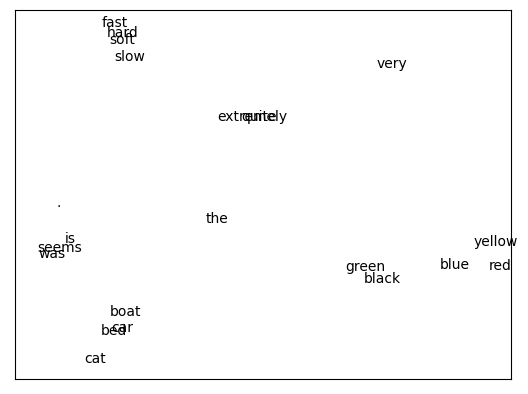

In [82]:
# Extract the first two principal components and transform the word vectors
components = pca(embedding.embeddings, 2)
transformed = transform(embedding.embeddings, components)
    
# Scatter the points (and make them white so they're "invisible")
fig, ax = plt.subplots()
ax.scatter(*zip(*transformed), marker='.', color='w')

# Add annotations for each word at its transformed location
for word, idx in vocab.w2i.items():
    ax.annotate(word, transformed[idx])
    
# And hide the axes
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

In [94]:
from bs4 import BeautifulSoup
import requests
    
url = "https://www.ycombinator.com/topcompanies"
soup = BeautifulSoup(requests.get(url).text, 'html.parser')

In [95]:
soup("b")

[<b title="Winter 2023 Batch">W2023</b>]

In [96]:
# We get the companies twice, so use a set comprehension to deduplicate.
companies = list({b.text
                  for b in soup
                  if "h4" in b.get("class", ())})
len(companies)

AttributeError: 'Doctype' object has no attribute 'get'

In [85]:
vocab = Vocabulary([c for company in companies for c in company])
    
START = "^"
STOP = "$"
    
# We need to add them to the vocabulary too.
vocab.add(START)
vocab.add(STOP)
    
HIDDEN_DIM = 32  # You should experiment with different sizes!
    
rnn1 =  SimpleRnn(input_dim=vocab.size, hidden_dim=HIDDEN_DIM)
rnn2 =  SimpleRnn(input_dim=HIDDEN_DIM, hidden_dim=HIDDEN_DIM)
linear = Linear(input_dim=HIDDEN_DIM, output_dim=vocab.size)
    
model = Sequential([
        rnn1,
        rnn2,
        linear
])

In [92]:
from deep_learning import softmax
    
def generate(seed: str = START, max_len: int = 50) -> str:
    rnn1.reset_hidden_state()  # Reset both hidden states.
    rnn2.reset_hidden_state()
    output = [seed]            # Start the output with the specified seed.
    
    # Keep going until we produce the STOP character or reach the max length
    while output[-1] != STOP and len(output) < max_len:
            # Use the last character as the input
            input = vocab.one_hot_encode(output[-1])
    
            # Generate scores using the model
            predicted = model.forward(input)
    
            # Convert them to probabilities and draw a random char_id
            probabilities = softmax(predicted)
            next_char_id = sample_from(probabilities)
    
            # Add the corresponding char to our output
            output.append(vocab.get_word(next_char_id))
    
    # Get rid of START and END characters and return the word.
    return ''.join(output[1:-1])

In [93]:
loss = SoftmaxCrossEntropy()
optimizer = Momentum(learning_rate=0.01, momentum=0.9)
    
for epoch in range(300):
    random.shuffle(companies)  # Train in a different order each epoch.
    epoch_loss = 0             # Track the loss.
    for company in tqdm.tqdm(companies):
            rnn1.reset_hidden_state()  # Reset both hidden states.
            rnn2.reset_hidden_state()
            company = START + company + STOP   # Add START and STOP characters.
    
            # The rest is just our usual training loop, except that the inputs
            # and target are the one-hot-encoded previous and next characters.
            for prev, next in zip(company, company[1:]):
                input = vocab.one_hot_encode(prev)
                target = vocab.one_hot_encode(next)
                predicted = model.forward(input)
                epoch_loss += loss.loss(predicted, target)
                gradient = loss.gradient(predicted, target)
                model.backward(gradient)
                optimizer.step(model)
    
    # Each epoch print the loss and also generate a name
    print(epoch, epoch_loss, generate())
    
    # Turn down the learning rate for the last 100 epochs.
    # There's no principled reason for this, but it seems to work.
    if epoch == 200:
        optimizer.lr *= 0.1

0it [00:00, ?it/s]


0 0 


0it [00:00, ?it/s]


1 0 


0it [00:00, ?it/s]


2 0 


0it [00:00, ?it/s]


3 0 


0it [00:00, ?it/s]


4 0 ^


0it [00:00, ?it/s]


5 0 ^^


0it [00:00, ?it/s]


6 0 ^


0it [00:00, ?it/s]


7 0 


0it [00:00, ?it/s]


8 0 


0it [00:00, ?it/s]


9 0 


0it [00:00, ?it/s]


10 0 


0it [00:00, ?it/s]


11 0 ^^


0it [00:00, ?it/s]


12 0 


0it [00:00, ?it/s]


13 0 ^^^


0it [00:00, ?it/s]


14 0 


0it [00:00, ?it/s]


15 0 


0it [00:00, ?it/s]


16 0 


0it [00:00, ?it/s]


17 0 


0it [00:00, ?it/s]


18 0 


0it [00:00, ?it/s]


19 0 


0it [00:00, ?it/s]


20 0 


0it [00:00, ?it/s]


21 0 


0it [00:00, ?it/s]


22 0 ^^^


0it [00:00, ?it/s]


23 0 


0it [00:00, ?it/s]


24 0 


0it [00:00, ?it/s]


25 0 ^^


0it [00:00, ?it/s]


26 0 ^^


0it [00:00, ?it/s]


27 0 


0it [00:00, ?it/s]


28 0 


0it [00:00, ?it/s]


29 0 


0it [00:00, ?it/s]


30 0 


0it [00:00, ?it/s]


31 0 ^


0it [00:00, ?it/s]


32 0 ^^


0it [00:00, ?it/s]


33 0 


0it [00:00, ?it/s]


34 0 


0it [00:00, ?it/s]


35 0 


0it [00:00, ?it/s]


36 0 


0it [00:00, ?it/s]


37 0 


0it [00:00, ?it/s]


38 0 


0it [00:00, ?it/s]


39 0 ^


0it [00:00, ?it/s]


40 0 ^


0it [00:00, ?it/s]


41 0 ^


0it [00:00, ?it/s]


42 0 


0it [00:00, ?it/s]


43 0 ^^^^^


0it [00:00, ?it/s]


44 0 


0it [00:00, ?it/s]


45 0 


0it [00:00, ?it/s]


46 0 


0it [00:00, ?it/s]


47 0 


0it [00:00, ?it/s]


48 0 


0it [00:00, ?it/s]


49 0 ^


0it [00:00, ?it/s]


50 0 


0it [00:00, ?it/s]


51 0 ^


0it [00:00, ?it/s]


52 0 ^^


0it [00:00, ?it/s]


53 0 ^


0it [00:00, ?it/s]


54 0 


0it [00:00, ?it/s]


55 0 


0it [00:00, ?it/s]


56 0 ^


0it [00:00, ?it/s]


57 0 


0it [00:00, ?it/s]


58 0 


0it [00:00, ?it/s]


59 0 


0it [00:00, ?it/s]


60 0 


0it [00:00, ?it/s]


61 0 


0it [00:00, ?it/s]


62 0 


0it [00:00, ?it/s]


63 0 


0it [00:00, ?it/s]


64 0 ^^


0it [00:00, ?it/s]


65 0 ^


0it [00:00, ?it/s]


66 0 


0it [00:00, ?it/s]


67 0 ^


0it [00:00, ?it/s]


68 0 ^^


0it [00:00, ?it/s]


69 0 ^^


0it [00:00, ?it/s]


70 0 


0it [00:00, ?it/s]


71 0 ^


0it [00:00, ?it/s]


72 0 


0it [00:00, ?it/s]

73 0 



0it [00:00, ?it/s]


74 0 


0it [00:00, ?it/s]


75 0 


0it [00:00, ?it/s]


76 0 


0it [00:00, ?it/s]


77 0 ^


0it [00:00, ?it/s]


78 0 


0it [00:00, ?it/s]


79 0 


0it [00:00, ?it/s]


80 0 ^


0it [00:00, ?it/s]


81 0 ^


0it [00:00, ?it/s]


82 0 


0it [00:00, ?it/s]


83 0 


0it [00:00, ?it/s]


84 0 


0it [00:00, ?it/s]


85 0 ^^


0it [00:00, ?it/s]


86 0 


0it [00:00, ?it/s]


87 0 


0it [00:00, ?it/s]


88 0 


0it [00:00, ?it/s]


89 0 


0it [00:00, ?it/s]


90 0 


0it [00:00, ?it/s]


91 0 


0it [00:00, ?it/s]


92 0 


0it [00:00, ?it/s]


93 0 


0it [00:00, ?it/s]


94 0 ^


0it [00:00, ?it/s]


95 0 


0it [00:00, ?it/s]


96 0 


0it [00:00, ?it/s]


97 0 


0it [00:00, ?it/s]


98 0 ^


0it [00:00, ?it/s]


99 0 


0it [00:00, ?it/s]


100 0 


0it [00:00, ?it/s]


101 0 


0it [00:00, ?it/s]


102 0 


0it [00:00, ?it/s]


103 0 


0it [00:00, ?it/s]


104 0 ^^^^^


0it [00:00, ?it/s]


105 0 


0it [00:00, ?it/s]


106 0 


0it [00:00, ?it/s]


107 0 


0it [00:00, ?it/s]


108 0 


0it [00:00, ?it/s]


109 0 


0it [00:00, ?it/s]


110 0 


0it [00:00, ?it/s]


111 0 


0it [00:00, ?it/s]


112 0 


0it [00:00, ?it/s]


113 0 


0it [00:00, ?it/s]


114 0 ^^


0it [00:00, ?it/s]


115 0 ^^^


0it [00:00, ?it/s]


116 0 ^


0it [00:00, ?it/s]


117 0 


0it [00:00, ?it/s]


118 0 


0it [00:00, ?it/s]


119 0 ^


0it [00:00, ?it/s]


120 0 ^^^^^


0it [00:00, ?it/s]


121 0 


0it [00:00, ?it/s]


122 0 


0it [00:00, ?it/s]


123 0 


0it [00:00, ?it/s]


124 0 ^^


0it [00:00, ?it/s]


125 0 


0it [00:00, ?it/s]


126 0 


0it [00:00, ?it/s]


127 0 


0it [00:00, ?it/s]


128 0 ^


0it [00:00, ?it/s]


129 0 


0it [00:00, ?it/s]


130 0 ^^^


0it [00:00, ?it/s]


131 0 


0it [00:00, ?it/s]


132 0 


0it [00:00, ?it/s]


133 0 ^^


0it [00:00, ?it/s]


134 0 


0it [00:00, ?it/s]


135 0 ^


0it [00:00, ?it/s]


136 0 


0it [00:00, ?it/s]


137 0 ^^


0it [00:00, ?it/s]


138 0 


0it [00:00, ?it/s]


139 0 


0it [00:00, ?it/s]


140 0 ^


0it [00:00, ?it/s]


141 0 ^


0it [00:00, ?it/s]


142 0 


0it [00:00, ?it/s]


143 0 ^^


0it [00:00, ?it/s]


144 0 ^^


0it [00:00, ?it/s]


145 0 


0it [00:00, ?it/s]


146 0 


0it [00:00, ?it/s]


147 0 


0it [00:00, ?it/s]


148 0 


0it [00:00, ?it/s]


149 0 ^


0it [00:00, ?it/s]

150 0 ^^



0it [00:00, ?it/s]


151 0 


0it [00:00, ?it/s]


152 0 


0it [00:00, ?it/s]


153 0 


0it [00:00, ?it/s]


154 0 


0it [00:00, ?it/s]


155 0 


0it [00:00, ?it/s]


156 0 ^


0it [00:00, ?it/s]


157 0 


0it [00:00, ?it/s]


158 0 ^^


0it [00:00, ?it/s]


159 0 ^^^


0it [00:00, ?it/s]


160 0 


0it [00:00, ?it/s]


161 0 


0it [00:00, ?it/s]


162 0 


0it [00:00, ?it/s]


163 0 ^


0it [00:00, ?it/s]


164 0 ^


0it [00:00, ?it/s]


165 0 


0it [00:00, ?it/s]


166 0 ^


0it [00:00, ?it/s]


167 0 ^


0it [00:00, ?it/s]


168 0 


0it [00:00, ?it/s]


169 0 ^


0it [00:00, ?it/s]


170 0 ^


0it [00:00, ?it/s]


171 0 ^


0it [00:00, ?it/s]


172 0 


0it [00:00, ?it/s]


173 0 ^


0it [00:00, ?it/s]


174 0 


0it [00:00, ?it/s]


175 0 ^^^


0it [00:00, ?it/s]


176 0 


0it [00:00, ?it/s]


177 0 


0it [00:00, ?it/s]


178 0 


0it [00:00, ?it/s]


179 0 ^^^


0it [00:00, ?it/s]


180 0 


0it [00:00, ?it/s]


181 0 ^


0it [00:00, ?it/s]


182 0 


0it [00:00, ?it/s]


183 0 


0it [00:00, ?it/s]


184 0 ^^


0it [00:00, ?it/s]


185 0 


0it [00:00, ?it/s]


186 0 


0it [00:00, ?it/s]


187 0 ^


0it [00:00, ?it/s]


188 0 ^


0it [00:00, ?it/s]


189 0 


0it [00:00, ?it/s]


190 0 ^


0it [00:00, ?it/s]


191 0 ^


0it [00:00, ?it/s]


192 0 


0it [00:00, ?it/s]


193 0 


0it [00:00, ?it/s]


194 0 


0it [00:00, ?it/s]


195 0 


0it [00:00, ?it/s]


196 0 


0it [00:00, ?it/s]


197 0 ^^


0it [00:00, ?it/s]


198 0 ^


0it [00:00, ?it/s]


199 0 


0it [00:00, ?it/s]


200 0 ^^


0it [00:00, ?it/s]


201 0 


0it [00:00, ?it/s]


202 0 


0it [00:00, ?it/s]


203 0 


0it [00:00, ?it/s]


204 0 


0it [00:00, ?it/s]


205 0 ^^^^


0it [00:00, ?it/s]


206 0 ^


0it [00:00, ?it/s]


207 0 ^


0it [00:00, ?it/s]


208 0 


0it [00:00, ?it/s]


209 0 


0it [00:00, ?it/s]


210 0 ^


0it [00:00, ?it/s]


211 0 


0it [00:00, ?it/s]


212 0 ^^^^


0it [00:00, ?it/s]


213 0 


0it [00:00, ?it/s]


214 0 


0it [00:00, ?it/s]


215 0 


0it [00:00, ?it/s]


216 0 ^^^


0it [00:00, ?it/s]


217 0 


0it [00:00, ?it/s]


218 0 


0it [00:00, ?it/s]


219 0 


0it [00:00, ?it/s]


220 0 ^^^


0it [00:00, ?it/s]


221 0 ^


0it [00:00, ?it/s]


222 0 ^


0it [00:00, ?it/s]


223 0 ^


0it [00:00, ?it/s]


224 0 ^^


0it [00:00, ?it/s]


225 0 


0it [00:00, ?it/s]


226 0 


0it [00:00, ?it/s]


227 0 ^


0it [00:00, ?it/s]


228 0 


0it [00:00, ?it/s]


229 0 


0it [00:00, ?it/s]


230 0 


0it [00:00, ?it/s]


231 0 


0it [00:00, ?it/s]


232 0 ^


0it [00:00, ?it/s]


233 0 


0it [00:00, ?it/s]


234 0 ^


0it [00:00, ?it/s]


235 0 


0it [00:00, ?it/s]


236 0 ^^


0it [00:00, ?it/s]


237 0 ^^


0it [00:00, ?it/s]


238 0 ^


0it [00:00, ?it/s]


239 0 ^


0it [00:00, ?it/s]


240 0 ^


0it [00:00, ?it/s]


241 0 


0it [00:00, ?it/s]


242 0 


0it [00:00, ?it/s]


243 0 


0it [00:00, ?it/s]


244 0 


0it [00:00, ?it/s]


245 0 ^


0it [00:00, ?it/s]


246 0 ^^^


0it [00:00, ?it/s]


247 0 ^


0it [00:00, ?it/s]


248 0 ^


0it [00:00, ?it/s]


249 0 


0it [00:00, ?it/s]


250 0 


0it [00:00, ?it/s]


251 0 ^^^


0it [00:00, ?it/s]


252 0 


0it [00:00, ?it/s]


253 0 


0it [00:00, ?it/s]


254 0 


0it [00:00, ?it/s]


255 0 ^


0it [00:00, ?it/s]


256 0 ^


0it [00:00, ?it/s]


257 0 ^


0it [00:00, ?it/s]


258 0 


0it [00:00, ?it/s]

259 0 



0it [00:00, ?it/s]


260 0 


0it [00:00, ?it/s]


261 0 ^


0it [00:00, ?it/s]


262 0 


0it [00:00, ?it/s]

263 0 ^^^^^



0it [00:00, ?it/s]


264 0 


0it [00:00, ?it/s]


265 0 ^^


0it [00:00, ?it/s]


266 0 


0it [00:00, ?it/s]


267 0 ^^^^


0it [00:00, ?it/s]


268 0 ^^


0it [00:00, ?it/s]

269 0 



0it [00:00, ?it/s]


270 0 ^


0it [00:00, ?it/s]


271 0 


0it [00:00, ?it/s]


272 0 ^


0it [00:00, ?it/s]


273 0 


0it [00:00, ?it/s]


274 0 


0it [00:00, ?it/s]


275 0 


0it [00:00, ?it/s]


276 0 ^^


0it [00:00, ?it/s]


277 0 


0it [00:00, ?it/s]


278 0 


0it [00:00, ?it/s]


279 0 


0it [00:00, ?it/s]


280 0 ^^^


0it [00:00, ?it/s]


281 0 


0it [00:00, ?it/s]


282 0 ^


0it [00:00, ?it/s]


283 0 ^


0it [00:00, ?it/s]


284 0 


0it [00:00, ?it/s]


285 0 ^


0it [00:00, ?it/s]


286 0 


0it [00:00, ?it/s]

287 0 



0it [00:00, ?it/s]


288 0 ^


0it [00:00, ?it/s]


289 0 


0it [00:00, ?it/s]


290 0 ^^


0it [00:00, ?it/s]

291 0 



0it [00:00, ?it/s]


292 0 


0it [00:00, ?it/s]


293 0 


0it [00:00, ?it/s]


294 0 ^


0it [00:00, ?it/s]


295 0 


0it [00:00, ?it/s]


296 0 ^^


0it [00:00, ?it/s]


297 0 ^


0it [00:00, ?it/s]


298 0 ^^


0it [00:00, ?it/s]

299 0 


In [ ]:
from deep_learning import Optimizer, Layer

class EmbeddingOptimizer(Optimizer):
    """
    Optimized for the case where there are
    only embedding layers with single id updates.
    """
    def __init__(self, learning_rate: float) -> None:
        self.lr = learning_rate

    def step(self, layer: Layer) -> None:
        for param, grad in zip(layer.params(), layer.grads()):
            # Find the first (only) row with nonzero values.
            for idx, row in enumerate(grad):
                if row[0] != 0:
                    break

            # Then update just that row.
            for j in range(len(row)):
                param[idx][j] -= grad[idx][j] * self.lr
